Clasificare a imaginilor utilizând TensorFlow și biblioteca Keras.

Importam librariile necesare

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import requests
import math


Incarcăm setul de date MNIST, care este un set de circa 60000 de imagini de 28x28px cu cifre scrise de mână.

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Normalizăm pixelii imaginilor de antrenament și de testare la intervalul [0, 1]. Astfel, toți pixelii vor avea valori între 0 și 1 în loc de valori între 0 și 255.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Această secțiune definește arhitectura modelului. Modelul este o rețea neuronală cu 3 straturi

Modelul Sequential Keras.

1.  Primul strat Flatten transforma imaginile de intrare de dimensiune (28, 28) într-un vector unidimensional de lungime 784.

2. Al doilea strat Dense are 128 de neuroni cu funcția de activare ReLU.

3. Al treilea strat Dense are 10 neuroni cu funcția de activare softmax.


In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Mai departe compilam modelul definit anterior. Optimizatorul utilizat este Adam, iar funcția de pierdere este sparse_categorical_crossentropy. Metrica utilizată pentru evaluarea modelului este acuratețea.

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Antrenăm modelul utilizând setul de date de antrenament. Modelul este antrenat de 5 ori.

In [6]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 12s 5ms/step - loss: 0.2641 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1173 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0804 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0608 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0476 - accuracy: 0.9851


313/313 [==============================] - 1s 3ms/step


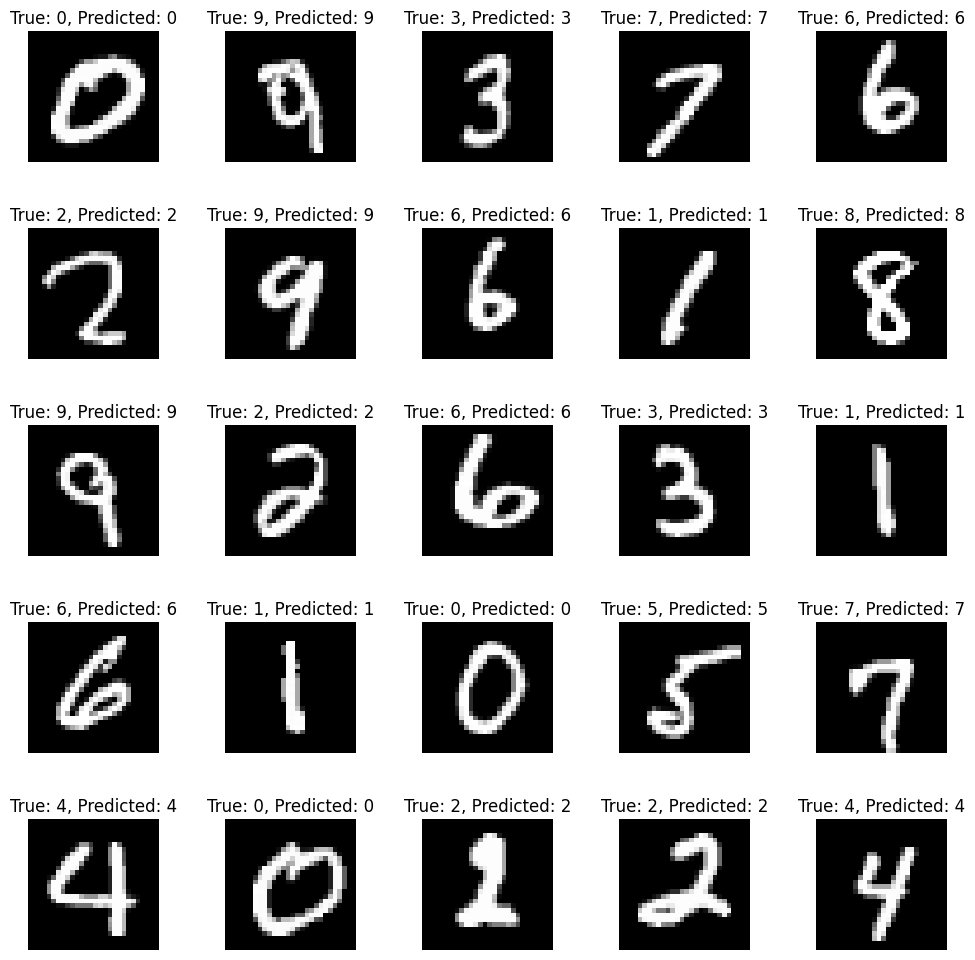

In [7]:
# Generare predicții pentru imaginile de test
predictions = model.predict(test_images)

# Alegem 25 de imagini random
random_indices = np.random.choice(len(test_images), size=25, replace=False)

# Cream o figură cu subplot-uri pentru afișarea imaginilor
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
fig.tight_layout()

# Parcurge indicii aleatorii și afișează imaginile
for i, index in enumerate(random_indices):
    true_label = test_labels[index]
    predicted_label = np.argmax(predictions[index])
    image_data = test_images[index]

    ax = axes[i // 5, i % 5]
    ax.imshow(image_data, cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {true_label}, Predicted: {predicted_label}")

# Afisam figura
plt.show()



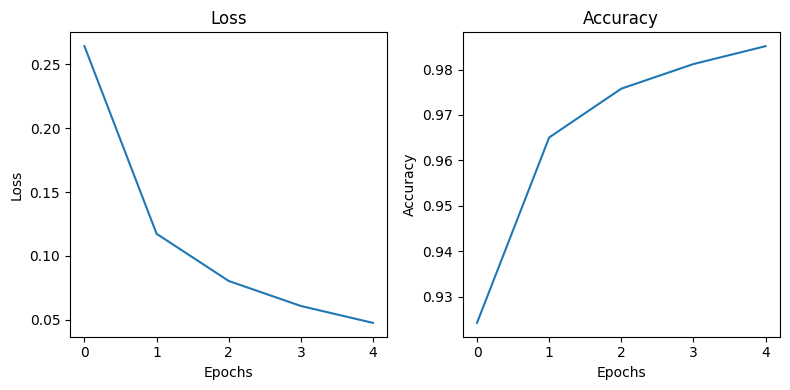

In [8]:
# Plotarea loss-ului și acurateții în funcție de epoci
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 34ms/step


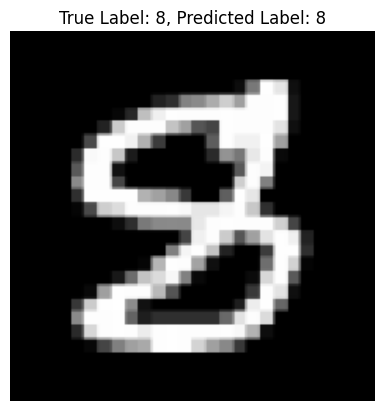

1/1 [==============================] - 0s 32ms/step


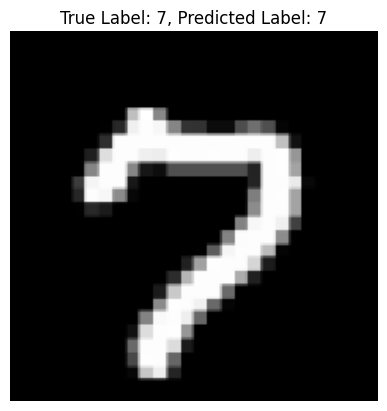

1/1 [==============================] - 0s 34ms/step


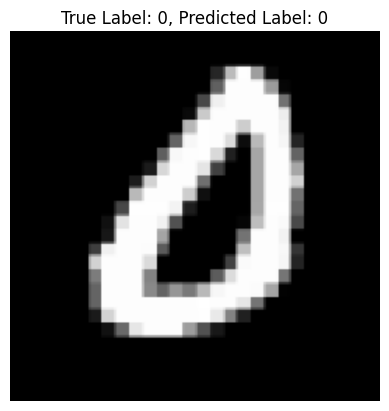

1/1 [==============================] - 0s 76ms/step


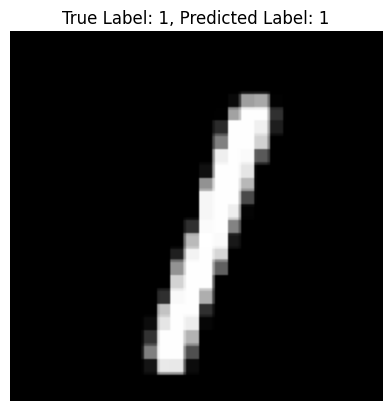

1/1 [==============================] - 0s 40ms/step


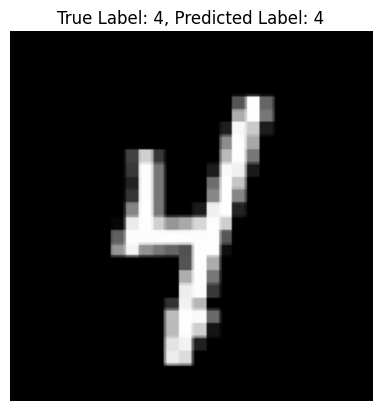

In [9]:
import os

# Procesam imaginea uploadata
def preprocess_image(image):
    image = image.convert('L')
    image = image.resize((28, 28))
    image = np.array(image) / 255.0
    return image

# clasificam imaginea uploadata de user
def classify_image(image):
    processed_image = preprocess_image(image)
    prediction = model.predict(np.expand_dims(processed_image, axis=0))
    predicted_label = np.argmax(prediction)
    return predicted_label

# Function to handle user-uploaded image
def handle_uploaded_image(image_path, true_label):
    image = Image.open(image_path)
    predicted_label = classify_image(image)

    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()

# User-specified images and labels
image_paths = [
    '8.png',
    '7.png',
    '0.png',
    '1.png',
    '4.png'
]
true_labels = [8, 7, 0, 1, 4]

for image_path, true_label in zip(image_paths, true_labels):
    if os.path.exists(image_path):
        handle_uploaded_image(image_path, true_label)
    else:
        print(f"Image not found: {image_path}")